<a href="https://colab.research.google.com/github/RAdvaithVIT/Deep-Learning-Codes-/blob/main/ANN_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
#making the dataset

N = 1000
X = np.random.random((N,2))*6-3 #uniform distribution between -3 to 3
Y = np.cos(2*X[:,0])+np.cos(3*X[:,1])

This implements the function:


>y=2cos(x1)+3cos(x2)



<function matplotlib.pyplot.show(close=None, block=None)>

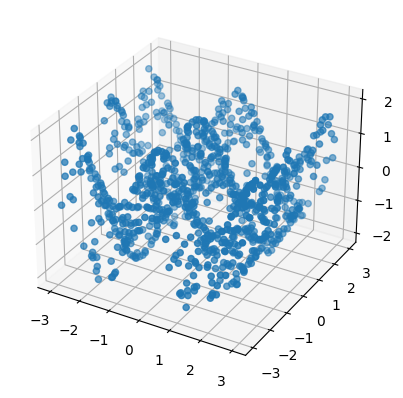

In [ ]:
#Plotting

fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],Y)
plt.show

In [ ]:
model = tf.keras.models.Sequential ([
    tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
    tf.keras.layers.Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile (
    optimizer=tf.keras.optimizers.Adam(0.01),
    loss='mse'
)

In [ ]:
r = model.fit(X,Y,epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0881
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9614  
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0013 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9884 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9401 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9072 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8954 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7695  
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7896 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7412 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6096 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5938 
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5598 
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5194 
Epoch 15/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - lo

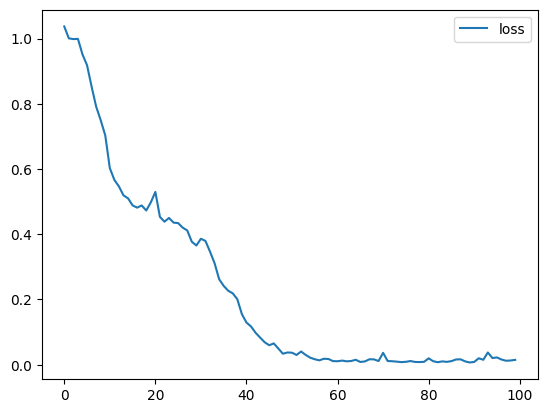

In [ ]:
plt.plot(r.history['loss'],label='loss')
plt.legend()

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

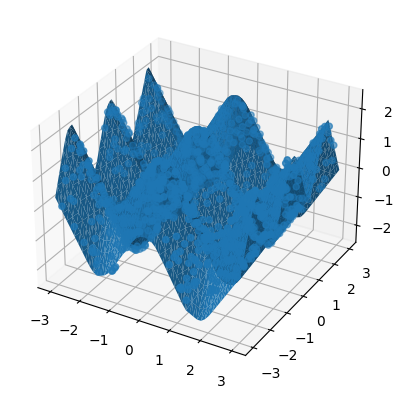

In [ ]:
#Plot the prediction surface

fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],Y)

line=np.linspace(-3,3,50)
xx,yy=np.meshgrid(line,line)
x_grid=np.vstack((xx.flatten(),yy.flatten())).T
ax.plot_trisurf(x_grid[:,0],x_grid[:,1], model.predict(x_grid).flatten(), linewidth=0.2, antialiased=True)
plt.show


We cannot extrapolate this graph as the system does not know the cosine range beyond -3 to 3. So for any other extened range, the graph will go in a kind of a straight line as an extension of the arm at the limiting values of the range, i.e. at -3 and 3